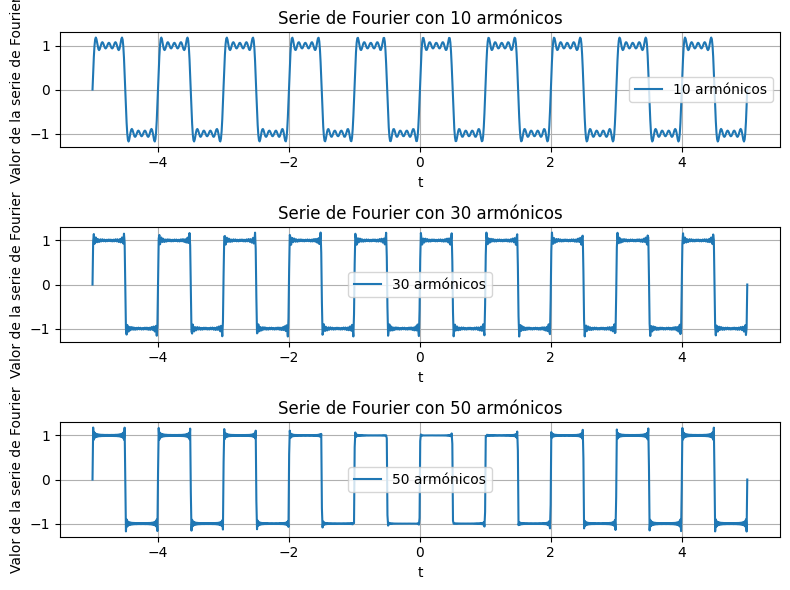

In [36]:
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
from calculo_de_series import calcular_bn_tren_de_pulsos

amount_of_sums = [10, 30, 50]

# Generar valores de t en el rango deseado
t = np.linspace(-5, 5, num=1000)  # 1000 puntos equiespaciados entre -5 y 5

# Crear subplots para cada cantidad de armónicos
fig, axes = plt.subplots(len(amount_of_sums), 1, figsize=(8, 6))

# Calcular y graficar la serie de Fourier para cada cantidad de armónicos
for idx, n in enumerate(amount_of_sums):
    resultados = []  # Lista para almacenar los resultados de la serie de Fourier

    # Calcular la serie de Fourier para cada valor de t
    for i in t:
        resultado = calcular_bn_tren_de_pulsos(i, n)
        resultados.append(resultado)

    # Graficar la señal calculada para esta cantidad de armónicos en un subplot
    ax = axes[idx] if len(amount_of_sums) > 1 else axes  # Obtener el subplot correspondiente
    ax.plot(t, resultados, label=f'{n} armónicos')
    ax.set_xlabel('t')
    ax.set_ylabel('Valor de la serie de Fourier')
    ax.set_title(f'Serie de Fourier con {n} armónicos')
    ax.legend()
    ax.grid(True)

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()


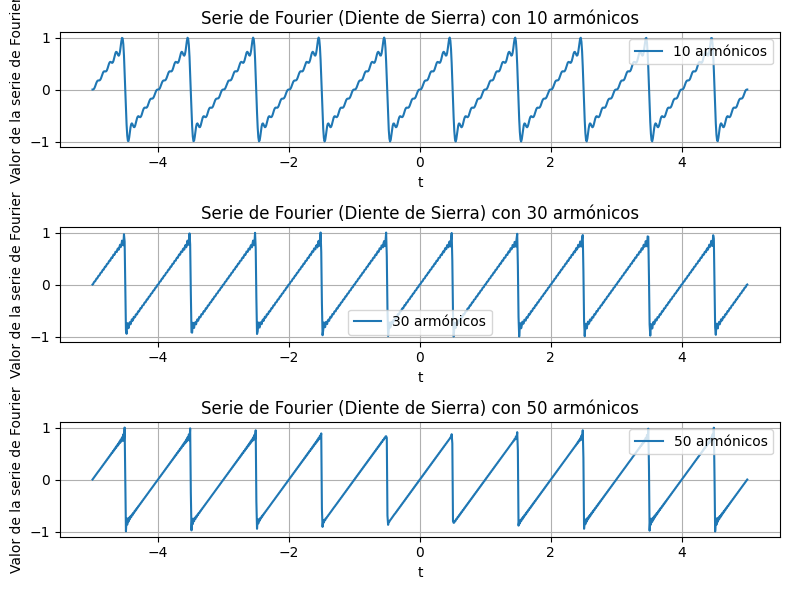

In [45]:
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
from calculo_de_series import calcular_bn_diente_sierra


# Generar valores de t en el rango deseado
t = np.linspace(-5, 5, num=1000)  # 1000 puntos equiespaciados entre -5 y 5

# Cantidades de armónicos para graficar
amount_of_sums = [10, 30, 50]

# Crear subplots para cada cantidad de armónicos
fig, axes = plt.subplots(len(amount_of_sums), 1, figsize=(8, 6))

# Iterar sobre cada cantidad de armónicos y graficar la serie de Fourier correspondiente
for idx, n in enumerate(amount_of_sums):
    resultados = []  # Lista para almacenar los resultados de la serie de Fourier para esta cantidad de armónicos
    
    # Calcular la serie de Fourier para cada valor de t
    for i in t:
        resultado = calcular_bn_diente_sierra(i, n)
        resultados.append(resultado)
    
    # Normalizar los resultados para que la amplitud máxima sea 1
    max_abs = np.max(np.abs(resultados))
    resultados /= max_abs
    
    # Graficar la señal calculada para esta cantidad de armónicos en un subplot
    ax = axes[idx] if len(amount_of_sums) > 1 else axes  # Obtener el subplot correspondiente
    
    ax.plot(t, resultados, label=f'{n} armónicos')  # Graficar sin invertir
    
    ax.set_xlabel('t')
    ax.set_ylabel('Valor de la serie de Fourier')
    ax.set_title(f'Serie de Fourier (Diente de Sierra) con {n} armónicos')
    ax.legend()
    ax.grid(True)

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi, sin

# Definir la función original (tren de pulsos)
def original_tren_de_pulsos(t):
    return np.where((t % 2) < 1, 1, 0)  # Tren de pulsos con período 2

# Función para calcular bn del tren de pulsos
def bn_tren_de_pulsos(t, n):
    return (2/(n*pi)) * (1 - (-1)**n) * (sin(2*pi*n*t))

# Función para calcular la serie de Fourier (sumatoria de bn) para el tren de pulsos
def calcular_serie_fourier_tren_de_pulsos(t, armonicos):
    val_actual_serie_bn = 0
    for i in range(1, armonicos + 1):
        val_actual_serie_bn += bn_tren_de_pulsos(t, i)
    return val_actual_serie_bn

# Función para calcular el error cuadrático medio (MSE) en zonas sin discontinuidades
def calcular_mse_sin_discontinuidades(funcion_original, aproximacion_funcion, t_eval):
    # Identificar índices de zonas sin discontinuidades
    indices_sin_discontinuidades = np.where((t_eval % 2) != 1)  # Zonas donde no hay discontinuidades
    mse_sin_discontinuidades = np.mean((funcion_original[indices_sin_discontinuidades] - 
                                        aproximacion_funcion[indices_sin_discontinuidades])**2)
    return mse_sin_discontinuidades

# Generar valores de t en el rango deseado
t_eval = np.linspace(-5, 5, num=1000)  # 1000 puntos equiespaciados entre -5 y 5

# Cantidades de armónicos para graficar
amount_of_sums = [10, 30, 50]

# Calcular y graficar la serie de Fourier para cada cantidad de armónicos
for n in amount_of_sums:
    # Calcular la serie de Fourier para cada valor de t
    aproximacion = np.array([calcular_serie_fourier_tren_de_pulsos(i, n) for i in t_eval])
    
    # Calcular la señal original (tren de pulsos)
    funcion_original = original_tren_de_pulsos(t_eval)

    # Calcular el MSE en zonas sin discontinuidades
    mse_sin_discontinuidades = calcular_mse_sin_discontinuidades(funcion_original, aproximacion, t_eval)
    
    # Reportar el resultado del MSE en zonas sin discontinuidades
    print(f"Error Cuadrático Medio (MSE) con {n} armónicos en zonas sin discontinuidades: {mse_sin_discontinuidades}")

Error Cuadrático Medio (MSE) con 10 armónicos en zonas sin discontinuidades: 1.4605462523197184
Error Cuadrático Medio (MSE) con 30 armónicos en zonas sin discontinuidades: 1.4874237370599501
Error Cuadrático Medio (MSE) con 50 armónicos en zonas sin discontinuidades: 1.4927886908486039


Iteración 10: MSE actual = 1.4576251598150793
Iteración 20: MSE actual = 1.47773278128947
Iteración 30: MSE actual = 1.4844488895858303
Iteración 40: MSE actual = 1.4877998993420207
Iteración 50: MSE actual = 1.4898031134669067
Iteración 60: MSE actual = 1.4911320344889722
Iteración 70: MSE actual = 1.4920754977913262
Iteración 80: MSE actual = 1.4927779666923904
Iteración 90: MSE actual = 1.4933197093301127
Iteración 100: MSE actual = 1.493748886889533
Iteración 110: MSE actual = 1.4940961440648457
Iteración 120: MSE actual = 1.494381905893446
Iteración 130: MSE actual = 1.4946203073915636
Iteración 140: MSE actual = 1.4948214392621713
Iteración 150: MSE actual = 1.4949926953729769
Iteración 160: MSE actual = 1.4951396149161365
Iteración 170: MSE actual = 1.4952664272858855
Iteración 180: MSE actual = 1.4953764152588551
Iteración 190: MSE actual = 1.4954721633971262
Iteración 200: MSE actual = 1.4955557318253674
Iteración 210: MSE actual = 1.4956287802350565
Iteración 220: MSE actual 

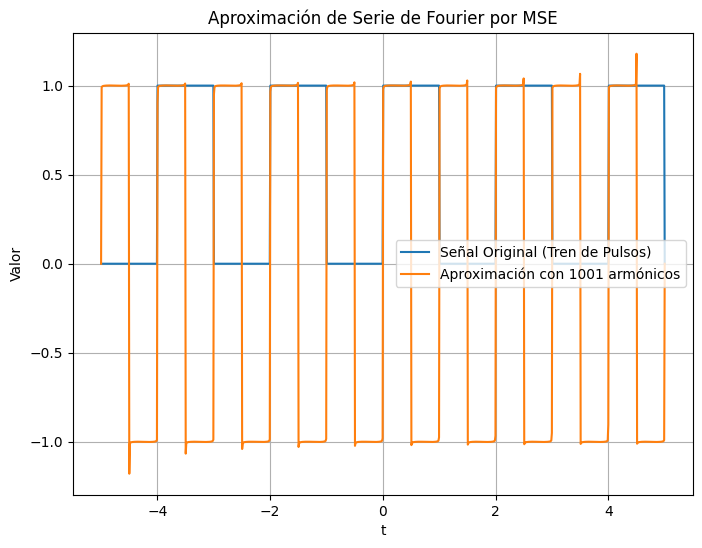

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi, sin

def original_tren_de_pulsos(t):
    return np.where((t % 2) < 1, 1, 0)  # Función original (tren de pulsos)

def bn_tren_de_pulsos(t, n):
    return (2/(n*pi)) * (1 - (-1)**n) * (sin(2*pi*n*t))

def calcular_serie_fourier_tren_de_pulsos(t, armonicos):
    val_actual_serie_bn = 0
    for i in range(1, armonicos + 1):
        val_actual_serie_bn += bn_tren_de_pulsos(t, i)
    return val_actual_serie_bn

def calcular_mse(funcion_original, aproximacion_funcion, t_eval):
    mse = np.mean((funcion_original - aproximacion_funcion)**2)
    return mse

def aproximar_con_mse(funcion_original, t_eval, mse_objetivo=0.01):
    armonicos = 0
    mse_actual = float('inf')
    aproximacion = np.zeros_like(t_eval)
    
    while mse_actual > mse_objetivo:
        armonicos += 1
        aproximacion = np.array([calcular_serie_fourier_tren_de_pulsos(i, armonicos) for i in t_eval])
        mse_actual = calcular_mse(funcion_original, aproximacion, t_eval)
        
        # Imprimir el progreso cada 10 iteraciones
        if armonicos % 10 == 0:
            print(f"Iteración {armonicos}: MSE actual = {mse_actual}")
        
        # Añadir una condición de salida adicional por seguridad
        if armonicos > 1000:  # Salir del ciclo si se supera un número máximo de armónicos
            print("Se ha alcanzado el límite máximo de armónicos sin cumplir el MSE objetivo.")
            break
    
    return aproximacion, armonicos

# Parámetros
t_eval = np.linspace(-5, 5, num=1000)  # Valores de t para la evaluación
mse_objetivo = 0.01  # Valor de MSE objetivo para detener la aproximación

# Aproximar con criterio de parada por MSE
aproximacion_final, num_armonicos = aproximar_con_mse(original_tren_de_pulsos(t_eval), t_eval, mse_objetivo)

# Graficar la señal original y la aproximación final
plt.figure(figsize=(8, 6))
plt.plot(t_eval, original_tren_de_pulsos(t_eval), label='Señal Original (Tren de Pulsos)')
plt.plot(t_eval, aproximacion_final, label=f'Aproximación con {num_armonicos} armónicos')
plt.xlabel('t')
plt.ylabel('Valor')
plt.title('Aproximación de Serie de Fourier por MSE')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi, sin

def calcular_bn_diente_sierra(t, armonicos):
    val_actual_serie_bn = 0
    for i in range(1, armonicos + 1):
        val_actual_serie_bn += bn_diente_de_sierra(t, i)
    return val_actual_serie_bn

def bn_diente_de_sierra(t, n):
    return (((-1)*((-1)**n))/(pi*n)) * (sin(2*pi*n*t))

def original_diente_sierra(t):
    return t - np.floor(t)

def calcular_mse(funcion_original, aproximacion_funcion, t_eval):
    mse = np.mean((funcion_original - aproximacion_funcion)**2)
    return mse

# Generar valores de t en el rango deseado
t_eval = np.linspace(-5, 5, num=1000)  # 1000 puntos equiespaciados entre -5 y 5

# Cantidades de armónicos para graficar
amount_of_sums = [10, 30, 50]

# Calcular y graficar la serie de Fourier para cada cantidad de armónicos
for n in amount_of_sums:
    # Calcular la serie de Fourier para cada valor de t
    aproximacion = np.array([calcular_bn_diente_sierra(i, n) for i in t_eval])
    
    # Calcular la señal original (diente de sierra)
    funcion_original = original_diente_sierra(t_eval)

    # Calcular el MSE en zonas sin discontinuidades
    mse_sin_discontinuidades = calcular_mse(funcion_original, aproximacion, t_eval)
    
    # Reportar el resultado del MSE en zonas sin discontinuidades
    print(f"Error Cuadrático Medio (MSE) con {n} armónicos en zonas sin discontinuidades: {mse_sin_discontinuidades}")

Error Cuadrático Medio (MSE) con 10 armónicos en zonas sin discontinuidades: 0.4937278240531607
Error Cuadrático Medio (MSE) con 30 armónicos en zonas sin discontinuidades: 0.49728661262824586
Error Cuadrático Medio (MSE) con 50 armónicos en zonas sin discontinuidades: 0.4979781837470024


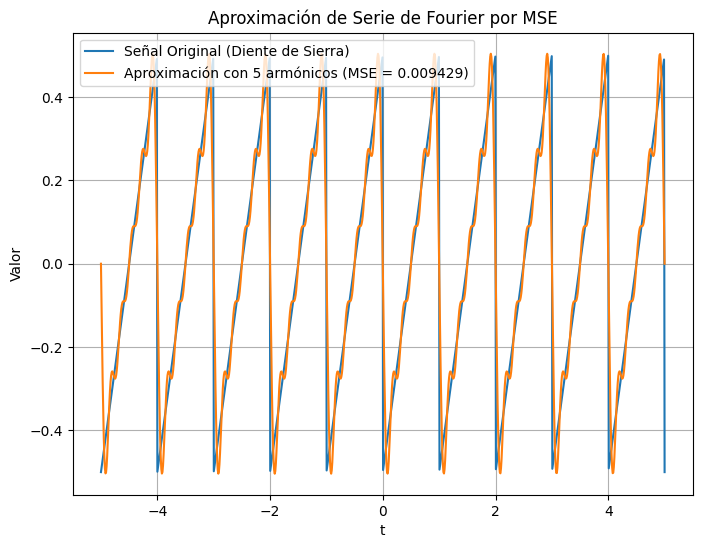

Cantidad de armónicos utilizados: 5


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi, sin

def calcular_bn_diente_sierra(t, armonicos):
    val_actual_serie_bn = 0
    for i in range(1, armonicos + 1):
        val_actual_serie_bn += bn_diente_de_sierra(t, i)
    return val_actual_serie_bn 

def bn_diente_de_sierra(t, n):
    return (((-1)*((-1)**n))/(pi*n)) * (sin(2*pi*n*t))

def original_diente_sierra(t):
    return t - np.floor(t) - 0.5

def calcular_mse(funcion_original, aproximacion_funcion, t_eval):
    mse = np.mean((funcion_original - aproximacion_funcion)**2)
    return mse

def aproximar_con_mse(funcion_original, t_eval, mse_objetivo=0.01, max_armonicos=100):
    armonicos = 0
    mse_actual = float('inf')
    aproximacion = np.zeros_like(t_eval)
    
    while mse_actual > mse_objetivo and armonicos < max_armonicos:
        armonicos += 1
        aproximacion = np.array([calcular_bn_diente_sierra(i - 0.5, armonicos) for i in t_eval])
        mse_actual = calcular_mse(funcion_original, aproximacion, t_eval)
    
    return aproximacion, armonicos, mse_actual

# Parámetros
t_eval = np.linspace(-5, 5, num=1000)  # Valores de t para la evaluación
mse_objetivo = 0.01  # Valor de MSE objetivo para detener la aproximación

# Función principal para aproximar con criterio de parada por MSE
aproximacion_final, num_armonicos, mse_final = aproximar_con_mse(original_diente_sierra(t_eval), t_eval, mse_objetivo)

# Graficar la señal original y la aproximación final
plt.figure(figsize=(8, 6))
plt.plot(t_eval, original_diente_sierra(t_eval), label='Señal Original (Diente de Sierra)')
plt.plot(t_eval, aproximacion_final, label=f'Aproximación con {num_armonicos} armónicos (MSE = {mse_final:.6f})')
plt.xlabel('t')
plt.ylabel('Valor')
plt.title('Aproximación de Serie de Fourier por MSE')
plt.legend()
plt.grid(True)
plt.show()

# Reportar la cantidad de armónicos utilizados
print(f"Cantidad de armónicos utilizados: {num_armonicos}")

